# Week 4 - Univariate Analysis, part 2

# 1. Lesson - None

# 2. Weekly graph question

Below are a histogram and boxplot representation of the same data. A pharmacy is keeping a record of the prices of the drugs that it sells, and an administrator wants to know how much the more expensive drugs tend to cost, in the context of the other prices.

Please write a short explanation of the pros and cons of these two representations. Which would you choose? How would you modify the formatting, if at all, to make it more visually interesting, clear, or informative?

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(0)
num_data = 100
data = np.exp(np.random.uniform(size = num_data) * 4)
df = pd.DataFrame(data.T, columns = ["data"])

The 75th percentile is: data    15.457656
Name: 0.75, dtype: float64


<Axes: ylabel='Frequency'>

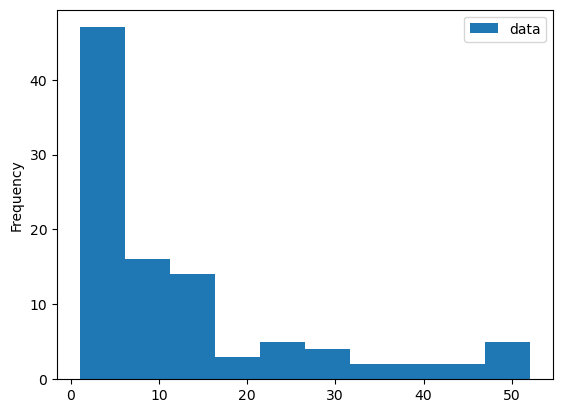

In [3]:
print("The 75th percentile is:", df.quantile(q = 0.75))
df.plot.hist()

- A histogram is a very impormative graph that can help identify outliers easily and understand how the data is distributed. visualizing data will help to get a sense of what the data looks like and help identify any issues. One drawback with using a histogram is that you won't be able to pinpoint the exact data points which is sometime handy. Also, the number of bins does influence how the histogram is displayed and could make it difficult to choose the number of bins that represents the data well. 

<Axes: >

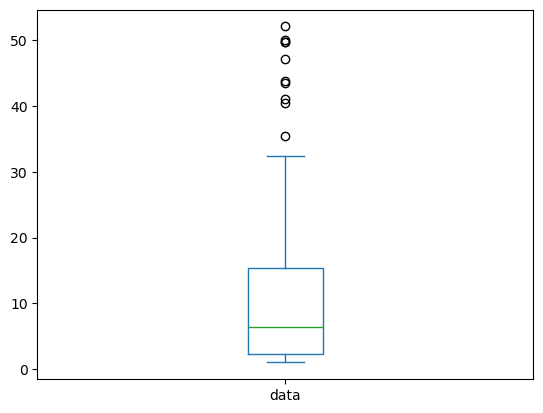

In [4]:
df.plot.box()

- The boxplot is very informative becasue it not only helps understand the distribution but also give key statistics like median, range, and quartiles. Also, the box plot does a better job at highlighting potential outliers and help with the analysis. For this box plot, I would do a variation of it using seaborn and and adding density to the boxplot.

# 3. Homework - working on your datasets

This week, you will do the same types of exercises as last week, but you should use your chosen datasets that someone in your class found last semester. (They likely will not be the particular datasets that you found yourself.)

### Here are some types of analysis you can do:

- Draw histograms and histogram variants for each feature or column.  (Swarm plot, kde plot, violin plot).

- Draw grouped histograms.  For instance, if you have tree heights for both maple and oak trees, you could draw histograms for both.

- Draw a bar plot to indicate total counts of each categorical variable in a given column.

- Find means, medians, and modes.

### Conclusions:

- Explain what conclusions you would draw from this analysis: are the data what you expect?  Are the data likely to be usable?  If they are not useable, find some new data!

- What is the overall shape of the distribution?  Is it normal, skewed, bimodal, uniform, etc.?

- Are there any outliers present?  (Data points that are far from the others.)

- If there are multiple related histograms, how does the distribution change across different groups?

- What are the minimum and maximum values represented in each histogram?

- How do bin sizes affect the histogram?  Does changing the bin width reveal different patterns in the data?

- Does the distribution appear normal, or does it have a different distribution?

In [5]:
import os 
os.chdir('/Users/felixelias/Desktop/Capstone/Data_final/insurance')

In [6]:
df_insurance_claims= pd.read_csv('insurance_claims.csv')
df_insurance_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [7]:
IC_cat_col= df_insurance_claims.select_dtypes(include='object')
IC_int_col= df_insurance_claims.select_dtypes(include='int')
print(len(IC_cat_col.columns), len(IC_int_col.columns))

21 17


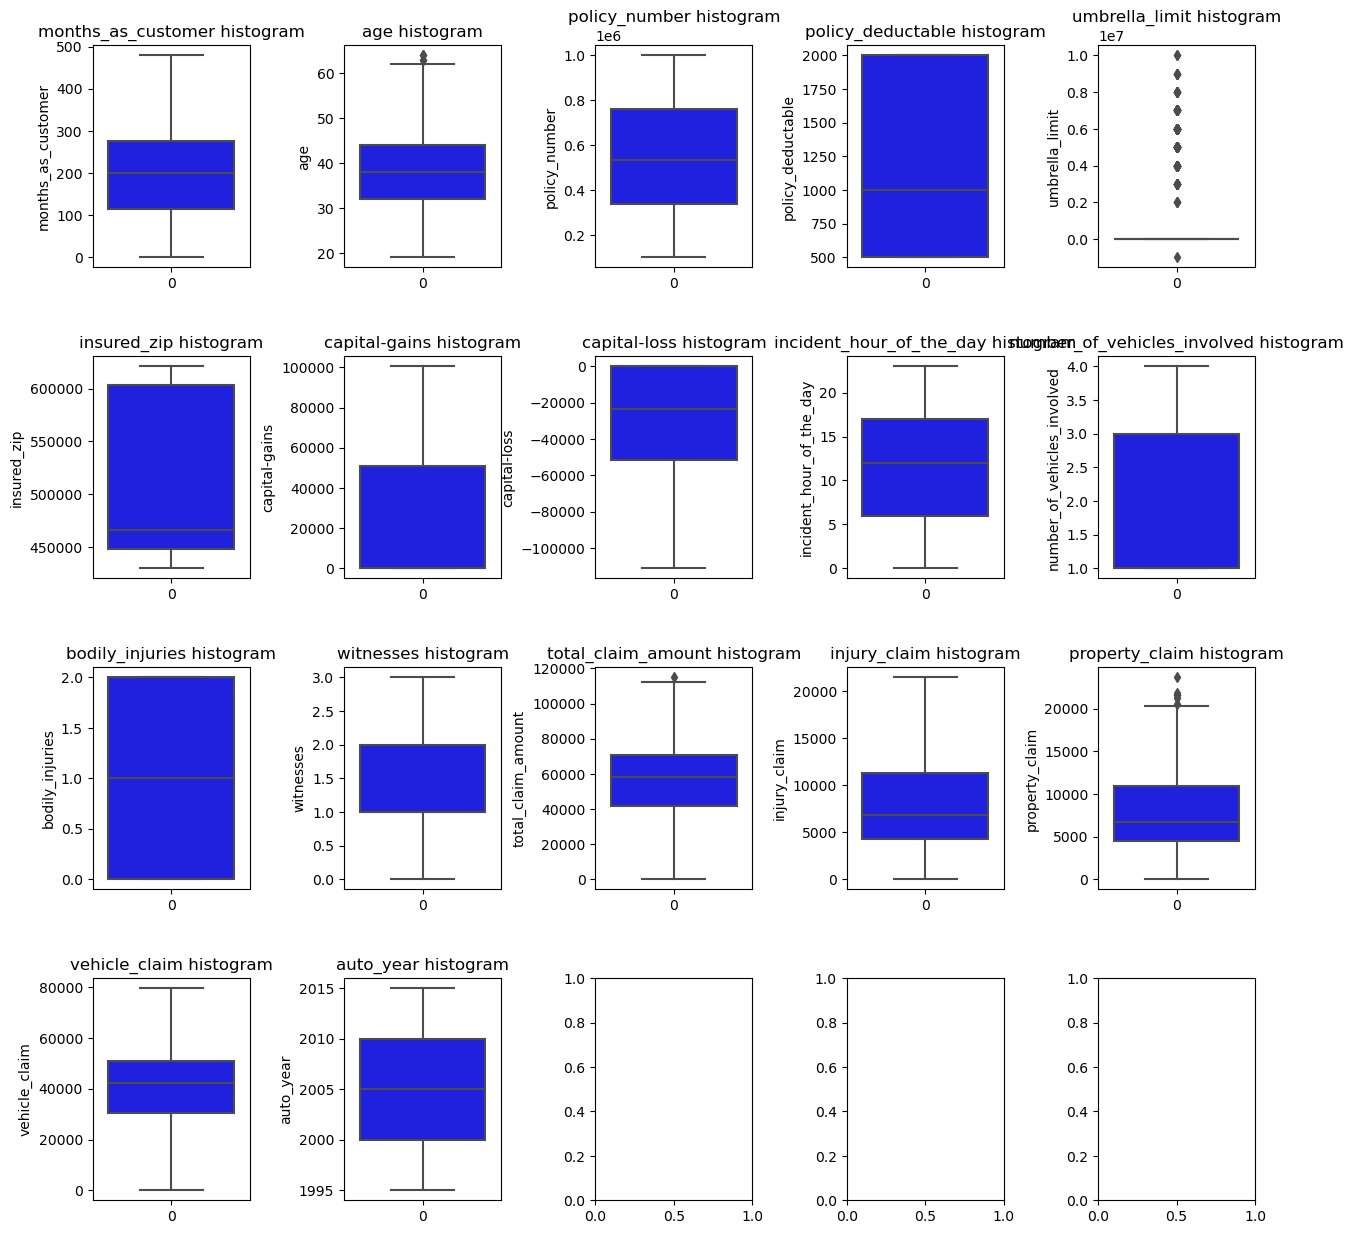

In [14]:
fig, axes = plt.subplots(4, 5, figsize=(15, 15)) 

for i,c in enumerate(IC_int_col.columns):
    row= i//5
    col=i%5
    sns.boxplot(IC_int_col[c], ax=axes[row, col], color='blue')
    plt.subplots_adjust(wspace=.6, hspace=.4)
    axes[row,col].set_title(f'{c} histogram')
    axes[row,col].set_ylabel(f'{c}')

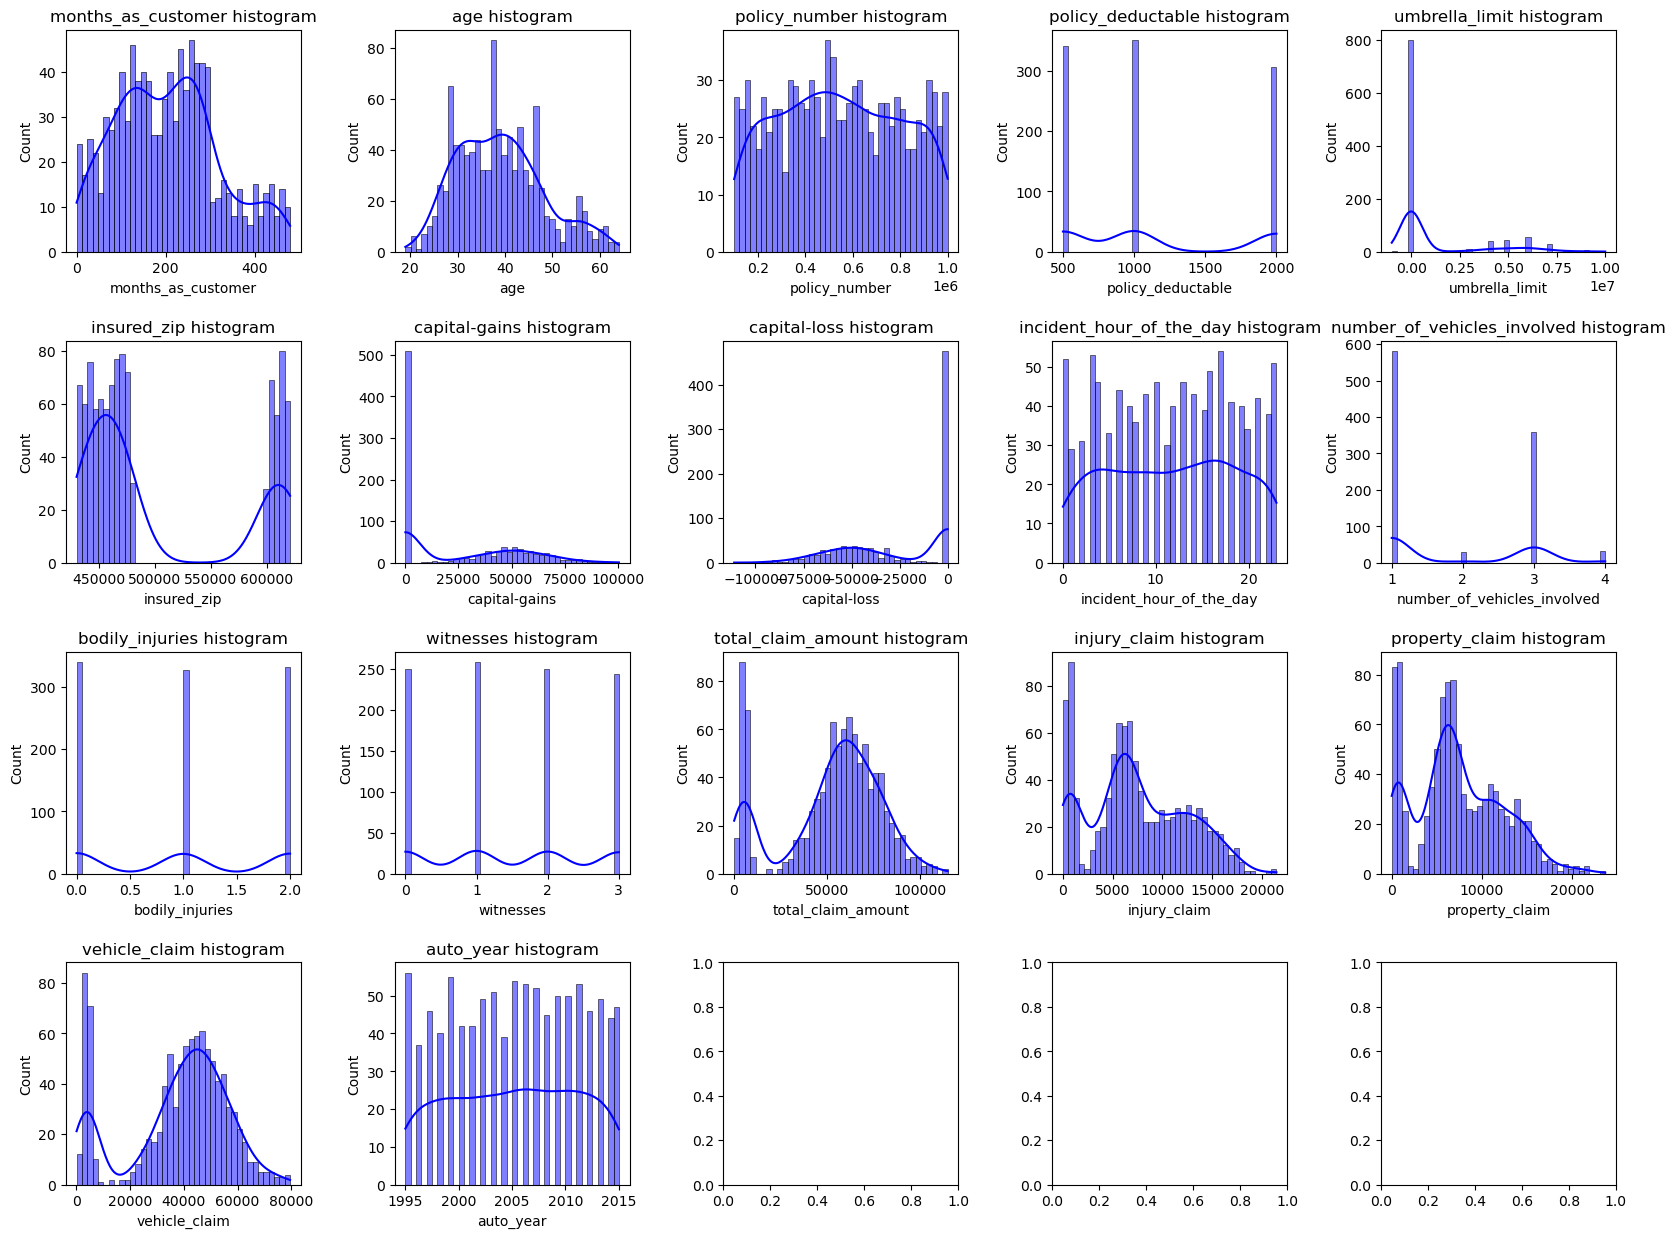

In [19]:
fig, axes = plt.subplots(4, 5, figsize=(20, 15)) 

for i,c in enumerate(IC_int_col.columns):
    row= i//5
    col=i%5
    sns.histplot(IC_int_col[c],bins=40, kde=True,ax=axes[row, col], color='blue')
    plt.subplots_adjust(wspace=.4, hspace=.4)
    axes[row,col].set_title(f'{c} histogram')
    axes[row,col].set_ylabel('Count')

- From the boxplots and histograms there were some interesting results. The first thing that caught my eye was a few columns that had normal distribution but with a big spike on the left or right of the distribution. For example, Vehicle claim histogram appears to be normally discributed around $45,000 but there is also a big spike around 0. This could indicate that there are crashes that are not too severe and are more smaller collision. Total claim amount also follow the simaliar conclusion.
- Injury claim and property claim are columns that have multimodal distribution which means that there are possibly multiple groups that have different characteritics. For example, the injury claim could have 3 groups within the data and might depend on the number of cars involded and age. It will require more analysis to determine the reason of the peaks in the histogram.
- One thing to point out is that a few columns have no important meaning like policy number and insured zipcode. zipcode may be useful in a different analysis but harder to understand in a histogram.
- Another observation is that the incident hour of the day column apears to increase then drop low then increse again which could indicate rush hour accidents when people are driving fast. 
- capital gains/loss columns have an interesting shape. They both appear normally distributed but looks less defined and it has a massive spike around 0. It could indicate that many acidents are not significant financially
- Bodily injuries, policy deductable, and witnesses columns are more uniform shape but more spread out. The few values that the column has seems to have equal occurence of each unique value in the column. For policy deductable, many people may have very similair policies or the insurance company only has a few options that customers can choose from.


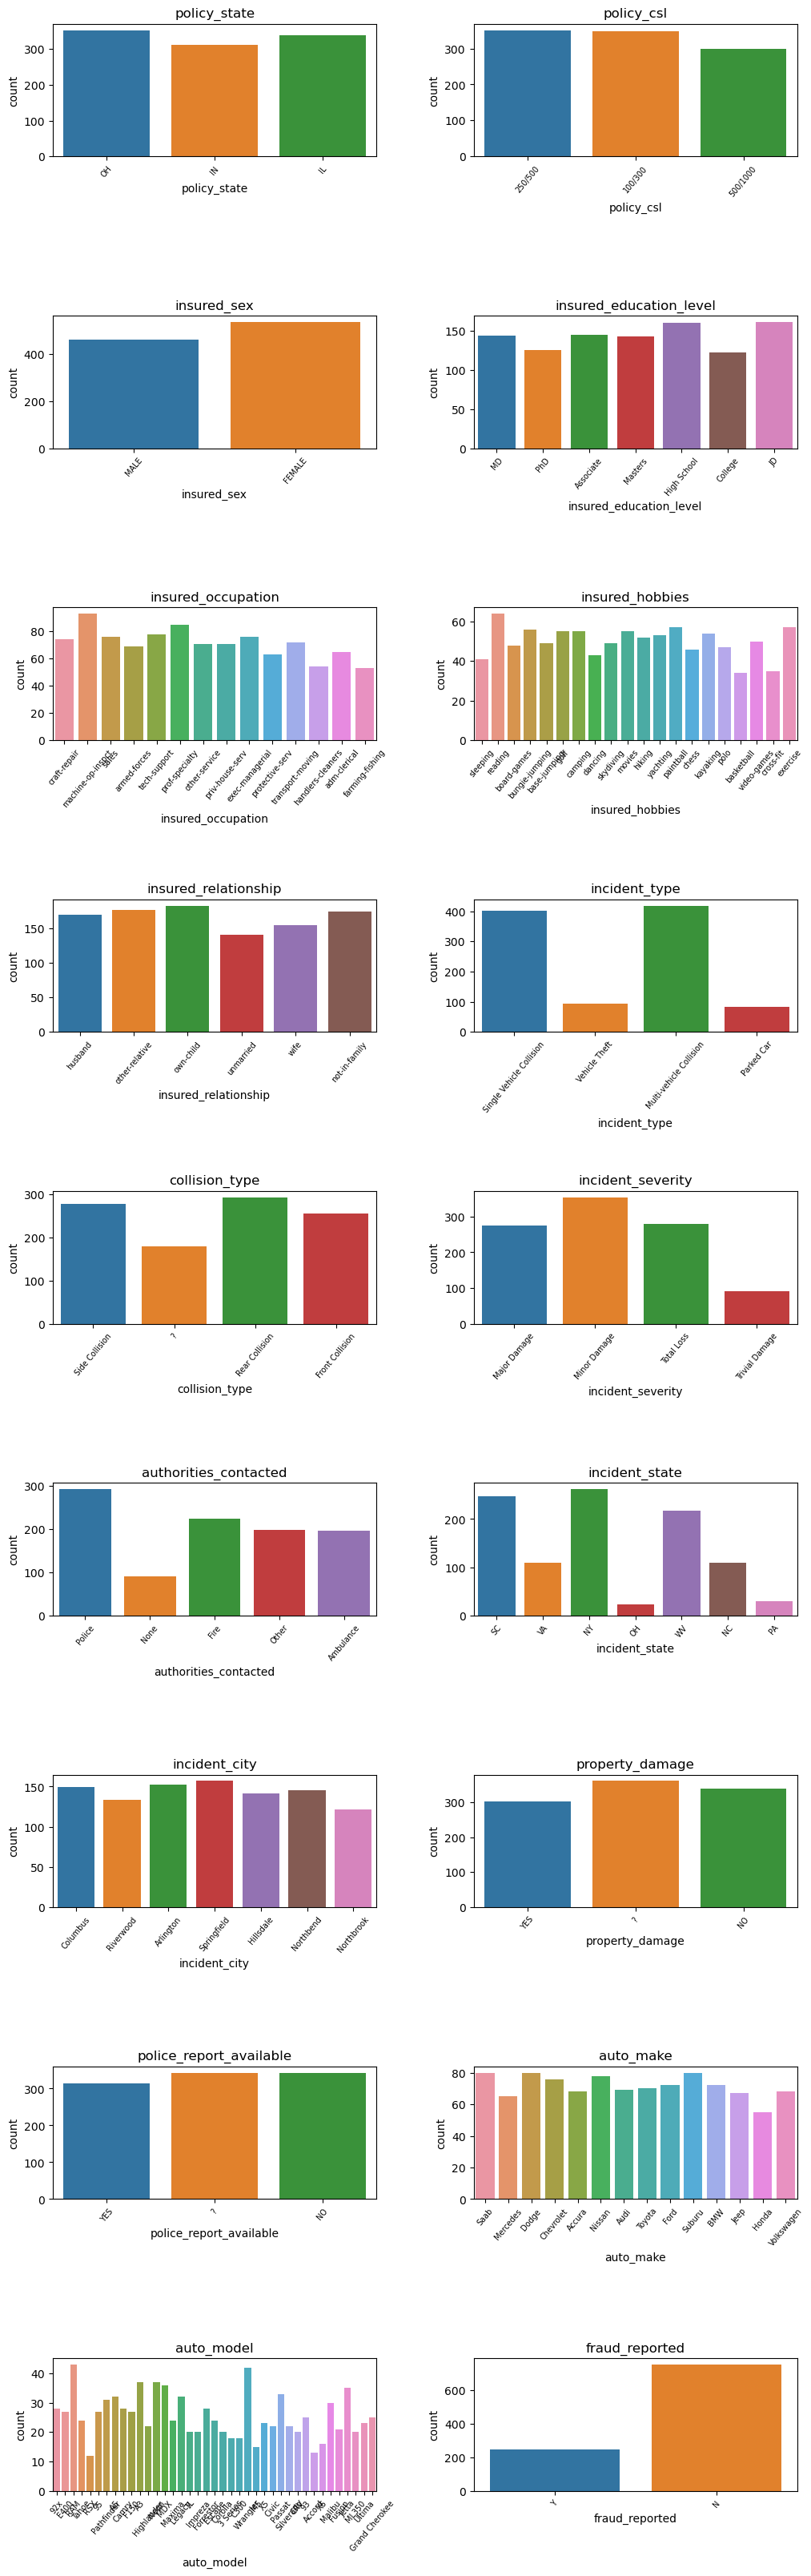

In [18]:
fig, axes = plt.subplots(9,2, figsize=(12,40))

for i,c in enumerate(IC_cat_col.drop(columns=['policy_bind_date', 'incident_date', 'incident_location']).columns):
    row= i//2
    col= i%2
    sns.countplot(x=c, data=IC_cat_col, ax=axes[row, col])
    plt.subplots_adjust(hspace=1.2, wspace=.3)
    axes[row, col].set_title(c)
    axes[row, col].tick_params(axis='x',rotation=50, labelsize=7)

- One important obervation is that fraud reported column is imbalanced. It may be a good idea to implement a technique called downsampling or upsampling to fix the imbalance.
- The bar charts look realatively normal with no unusual observation.
- Incident colunm provies interesting imformation that shows where incidents occur the most by state. It will be intersting to see if the state where the accident occured, influences if the claim is fraud. It could imply that certain states have lose laws that influences more fraud to occur. But given that there is an imbalance in the target variable, it may be more challenging find the impact that is statistacally significant.
- Car model type is not evenly distributed and we can see that a Ram and c300 are the most popular cars. Also, it could be interesting to break this column into more columns like the car brand, the type of car (sedan, suv, or truck), and the cost of the car. There may be a connection between car type and fraud reported because the amount of damage can change depending on the car type which influences the amount of the payout the insurance has to incurr. For example, since trucks are more expensive, people may be more likey to get insurance money to pay for the costs. 


# Dataset 2 Vehicle Insurance Fraud Detection

In [19]:
df_car_claims=pd.read_csv('carclaims.csv')
df_car_claims.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange-Claim,NumberOfCars,Year,BasePolicy,FraudFound
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,No
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,No
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,No
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,No
4,Jan,5,Monday,Honda,Urban,Tuesday,Feb,2,Female,Single,...,31 to 35,No,No,External,none,no change,1 vehicle,1994,Collision,No


In [20]:
df_car_claims.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15420 entries, 0 to 15419
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Month                 15420 non-null  object
 1   WeekOfMonth           15420 non-null  int64 
 2   DayOfWeek             15420 non-null  object
 3   Make                  15420 non-null  object
 4   AccidentArea          15420 non-null  object
 5   DayOfWeekClaimed      15420 non-null  object
 6   MonthClaimed          15420 non-null  object
 7   WeekOfMonthClaimed    15420 non-null  int64 
 8   Sex                   15420 non-null  object
 9   MaritalStatus         15420 non-null  object
 10  Age                   15420 non-null  int64 
 11  Fault                 15420 non-null  object
 12  PolicyType            15420 non-null  object
 13  VehicleCategory       15420 non-null  object
 14  VehiclePrice          15420 non-null  object
 15  PolicyNumber          15420 non-null

In [21]:
columns_list = [
    'WeekOfMonth', 
    'WeekOfMonthClaimed', 
    'Age', 
    'Deductible', 
    'DriverRating', 
    'Year'
]
df_car_claims[columns_list].describe().round(2)

,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,DriverRating,Year
count,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00
mean,2.79,2.69,39.86,407.70,2.49,1994.87
std,1.29,1.26,13.49,43.95,1.12,0.80
min,1.00,1.00,0.00,300.00,1.00,1994.00
25%,2.00,2.00,31.00,400.00,1.00,1994.00
50%,3.00,3.00,38.00,400.00,2.00,1995.00
75%,4.00,4.00,48.00,400.00,3.00,1996.00
max,5.00,5.00,80.00,700.00,4.00,1996.00


In [22]:
cat_col = df_car_claims.select_dtypes(include='object')
int_col=df_car_claims.select_dtypes(include='int')

In [23]:
columns_list = [
    'WeekOfMonth', 
    'WeekOfMonthClaimed', 
    'Age', 
    'Deductible', 
    'DriverRating', 
    'Year'
]
df_car_claims[columns_list].describe(percentiles=[.25, .5, .95]).round(2)

,WeekOfMonth,WeekOfMonthClaimed,Age,Deductible,DriverRating,Year
count,15420.00,15420.00,15420.00,15420.00,15420.00,15420.00
mean,2.79,2.69,39.86,407.70,2.49,1994.87
std,1.29,1.26,13.49,43.95,1.12,0.80
min,1.00,1.00,0.00,300.00,1.00,1994.00
25%,2.00,2.00,31.00,400.00,1.00,1994.00
50%,3.00,3.00,38.00,400.00,2.00,1995.00
95%,5.00,5.00,64.00,400.00,4.00,1996.00
max,5.00,5.00,80.00,700.00,4.00,1996.00


Text(0, 0.5, 'Counts')

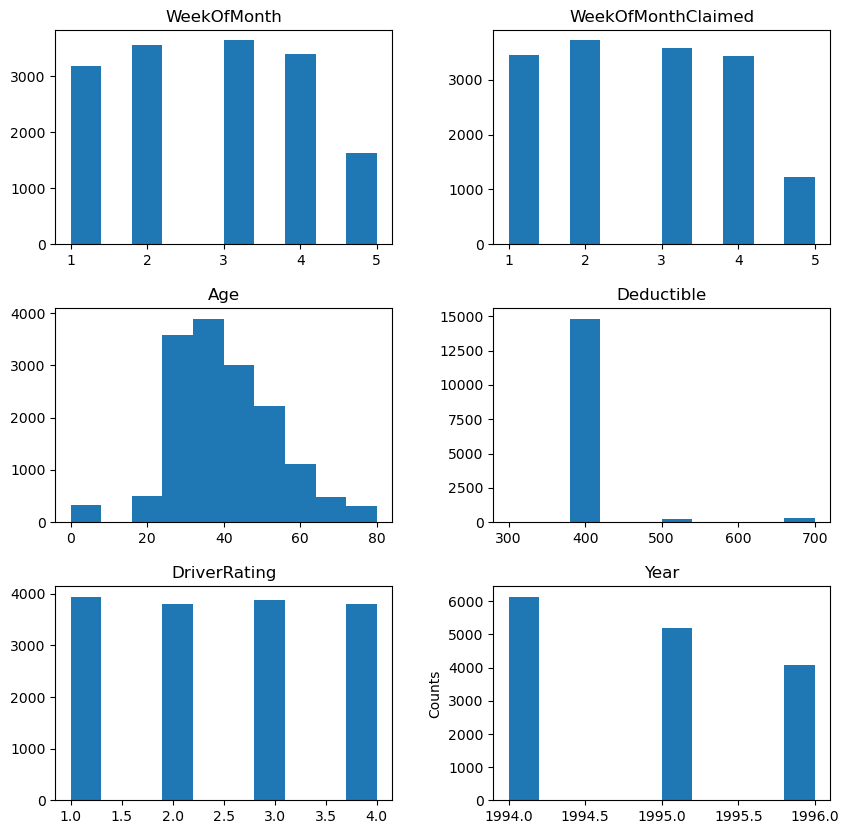

In [24]:
int_col.drop(columns=['PolicyNumber', 'RepNumber']).hist(grid=False, figsize=(10,10)) #removed policy number and repNumber becasue they have no meaning.
plt.ylabel('Counts')

- Deductable column seems to have outliers based on the descriptive statistics. 95% percent of the data has deductable of 400 which means that the column would not be relevant for predicting if fraud was found
- week of the month and week of month claimed have a value of 5 that in relatively low but it can be explained with the fact that week 5 of a month tends to be really short.
- The DriverRating column seems to have equal occurence of each unique value in the column that ranges from 1-4. It is interesting to see how the rating impacts fraud detection but it does raise some questions. Understanding how the driving rating is calculated is very important to continue this analysis but no information about it is provided. Does 1 mean that has many speeding tickes or accidents, if so how many? Or it based in driving test exam results? How much is 2 better than 1? Knowing how it is caluculated helps us make sure interpret the results better for decision making.
- The year column clearly show that the data are from 1994-1996. But given that there is also the month in the dataset, it may be resonable to create a data column which would help with time series analysis. This could help us discover any trends over time.
- Age column is roughly normally distributed but appears to be outliers. There seems to be rows that have 0 for age which is can't be possible and will require it to be removed. 

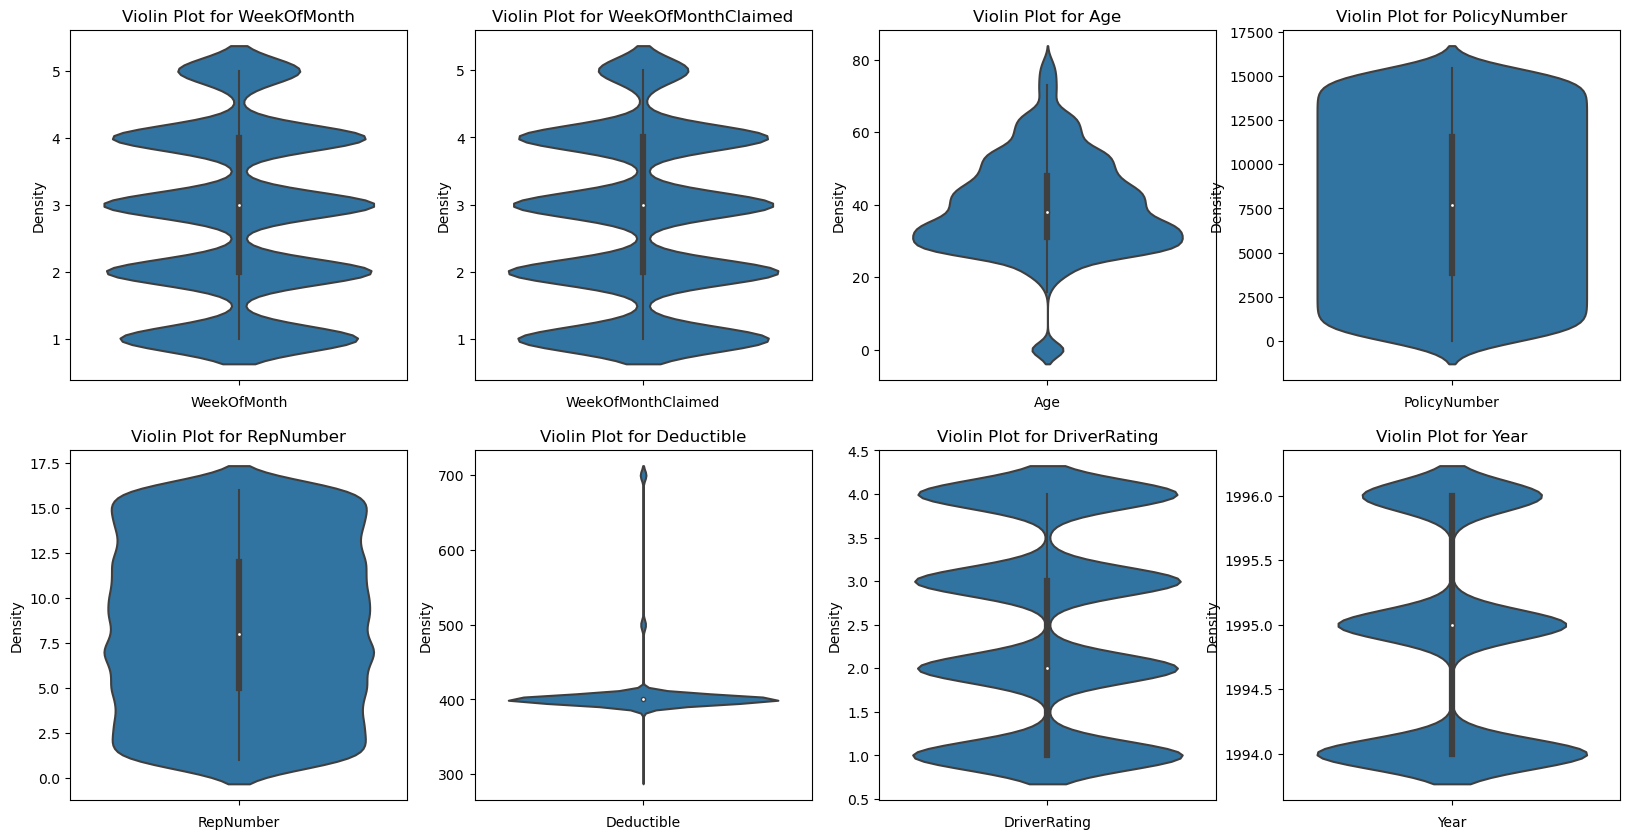

In [25]:
num_col= len(int_col.columns)

fig,axes= plt.subplots(2, 4, figsize=(20,10))

for i,c in enumerate(int_col.columns):
    row=i//4
    col= i%4
    sns.violinplot(y=int_col[c], ax=axes[row,col])
    axes[row,col].set_title(f'Violin Plot for {c}')
    axes[row,col].set_xlabel(c)
    axes[row,col].set_ylabel('Density')


- These violin plots demonstrates or confirms the analysis from histograms.

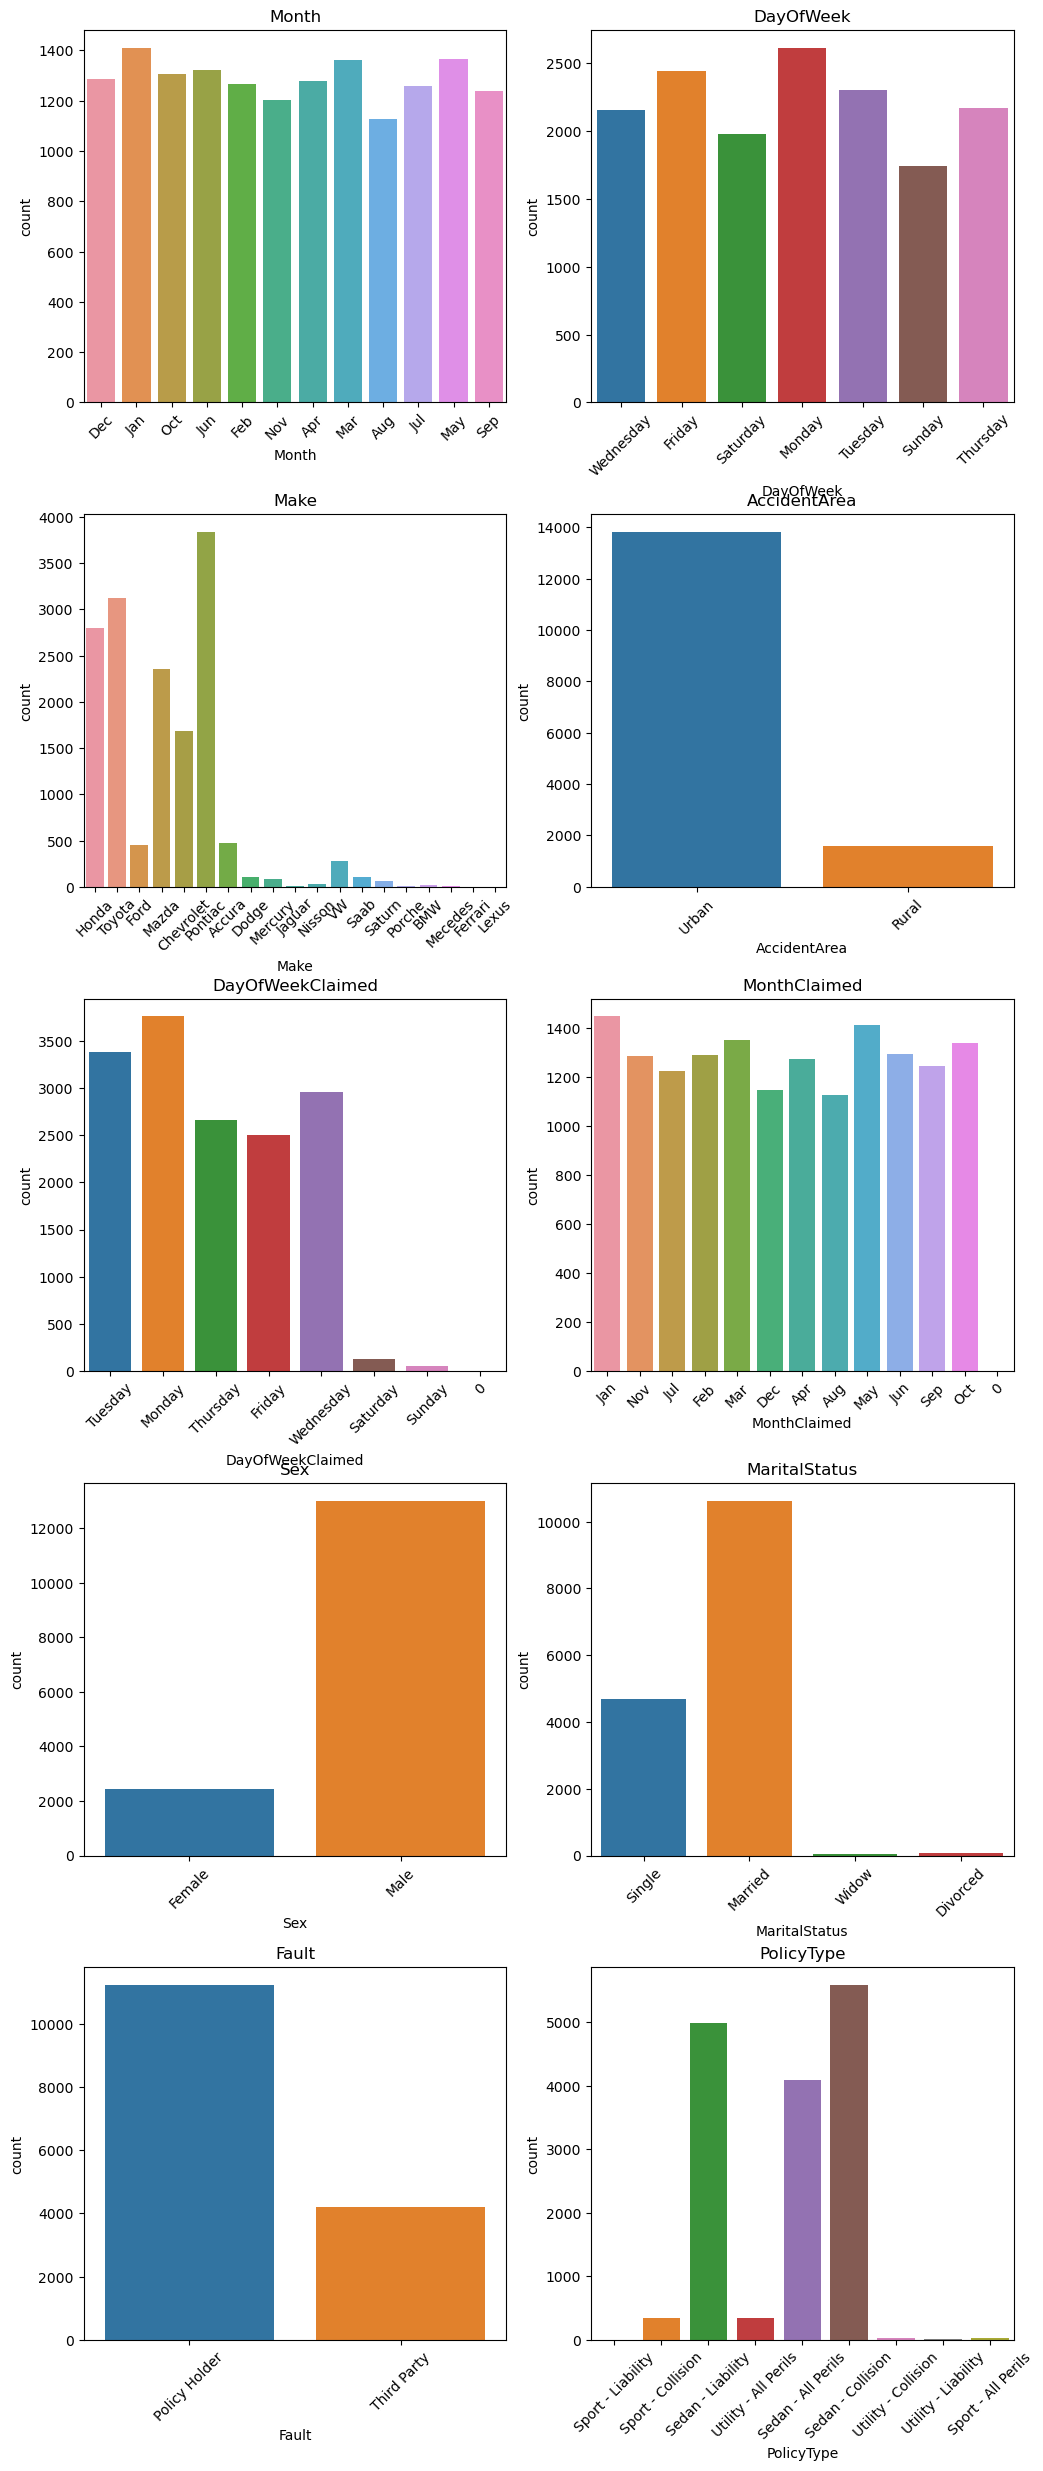

In [30]:
# Create a 9x3 grid of subplots (9 rows, 3 columns)
fig, ax = plt.subplots(5, 2, figsize=(12, 30))

# Loop through each column in cat_col
for i, c in enumerate(cat_col.columns[0:10]):
    row = i // 2
    col = i % 2 
    sns.countplot(x=c, data=cat_col, ax=ax[row, col])
    # Set labels for the x-axis
    ax[row, col].set_title(c)
    ax[row, col].tick_params(axis='x', rotation=45)
    plt.subplots_adjust(hspace=0.3, wspace=0.2)


- Month, Month Claimed, and Day of the week columns are showing that each unique value in the columns are equally represented in the data. There isn't unique value that occurs more than the rest of the unique values. 
- The Make of the car defintely shows that Honda and Toyota, and chevrolet are the most popular cars that people drive. There are many other Makes that are in the dataset but are not very popular and it could be resonable to eliminate rows with those makes because keeping them in may add noise to the model.
- Accident Area has a class imbalance but it does make sense of why it would. Most rural areas have less accidents because there are less roads and traffic which is less likely to occur. But at the same time, rural areas have highways that run throungh them which then would mean that rural accidents are more highway crashes. 
- Day of the week claimed shows interesting results. Monday to friday seems to show normal results but saturday and sunday fall drastically. The only explaination that I can think of is that insurance companies are closed on the weekends and most of the calims claimed on those days were emergencies. Also, it;s important to point out that monday has the biggest count of claims claimed which could indicate that all accidents that occured over the weekend is filed on monday then continued on tuesday.
- This dataset contain a lot more males than females which could mean that males are far more likely to get into car accidents because they are more reckless.
- Marital status column is primarely consist of single and married individuals and widows and divorced individuals are almost nonexistant. Based on that, I believe it would be reasonable to filter the data to exlude widow and divorced individuals to avoid unnecessary noise. 
- The data shows that policyholders are at fault the majority of the time. It would be interesting to see add another dimension to the graph like fraud found. It may be that policy holder who are at fauld are more likey to commit fraud because they think they can work around their policy to ensure they get the payout.
- There wansn't a description of the policy type meaning and what each unique value represents. Based on what i reasearched utility corresponds to vehicles that are used for carring cargo and concidered work trucks. Sport indicates cars that are labeled as sport by the manufacturer. Overall, the column provides doesn't have the policies spread out evenly and 3 of them over power the rest and may not be useful.

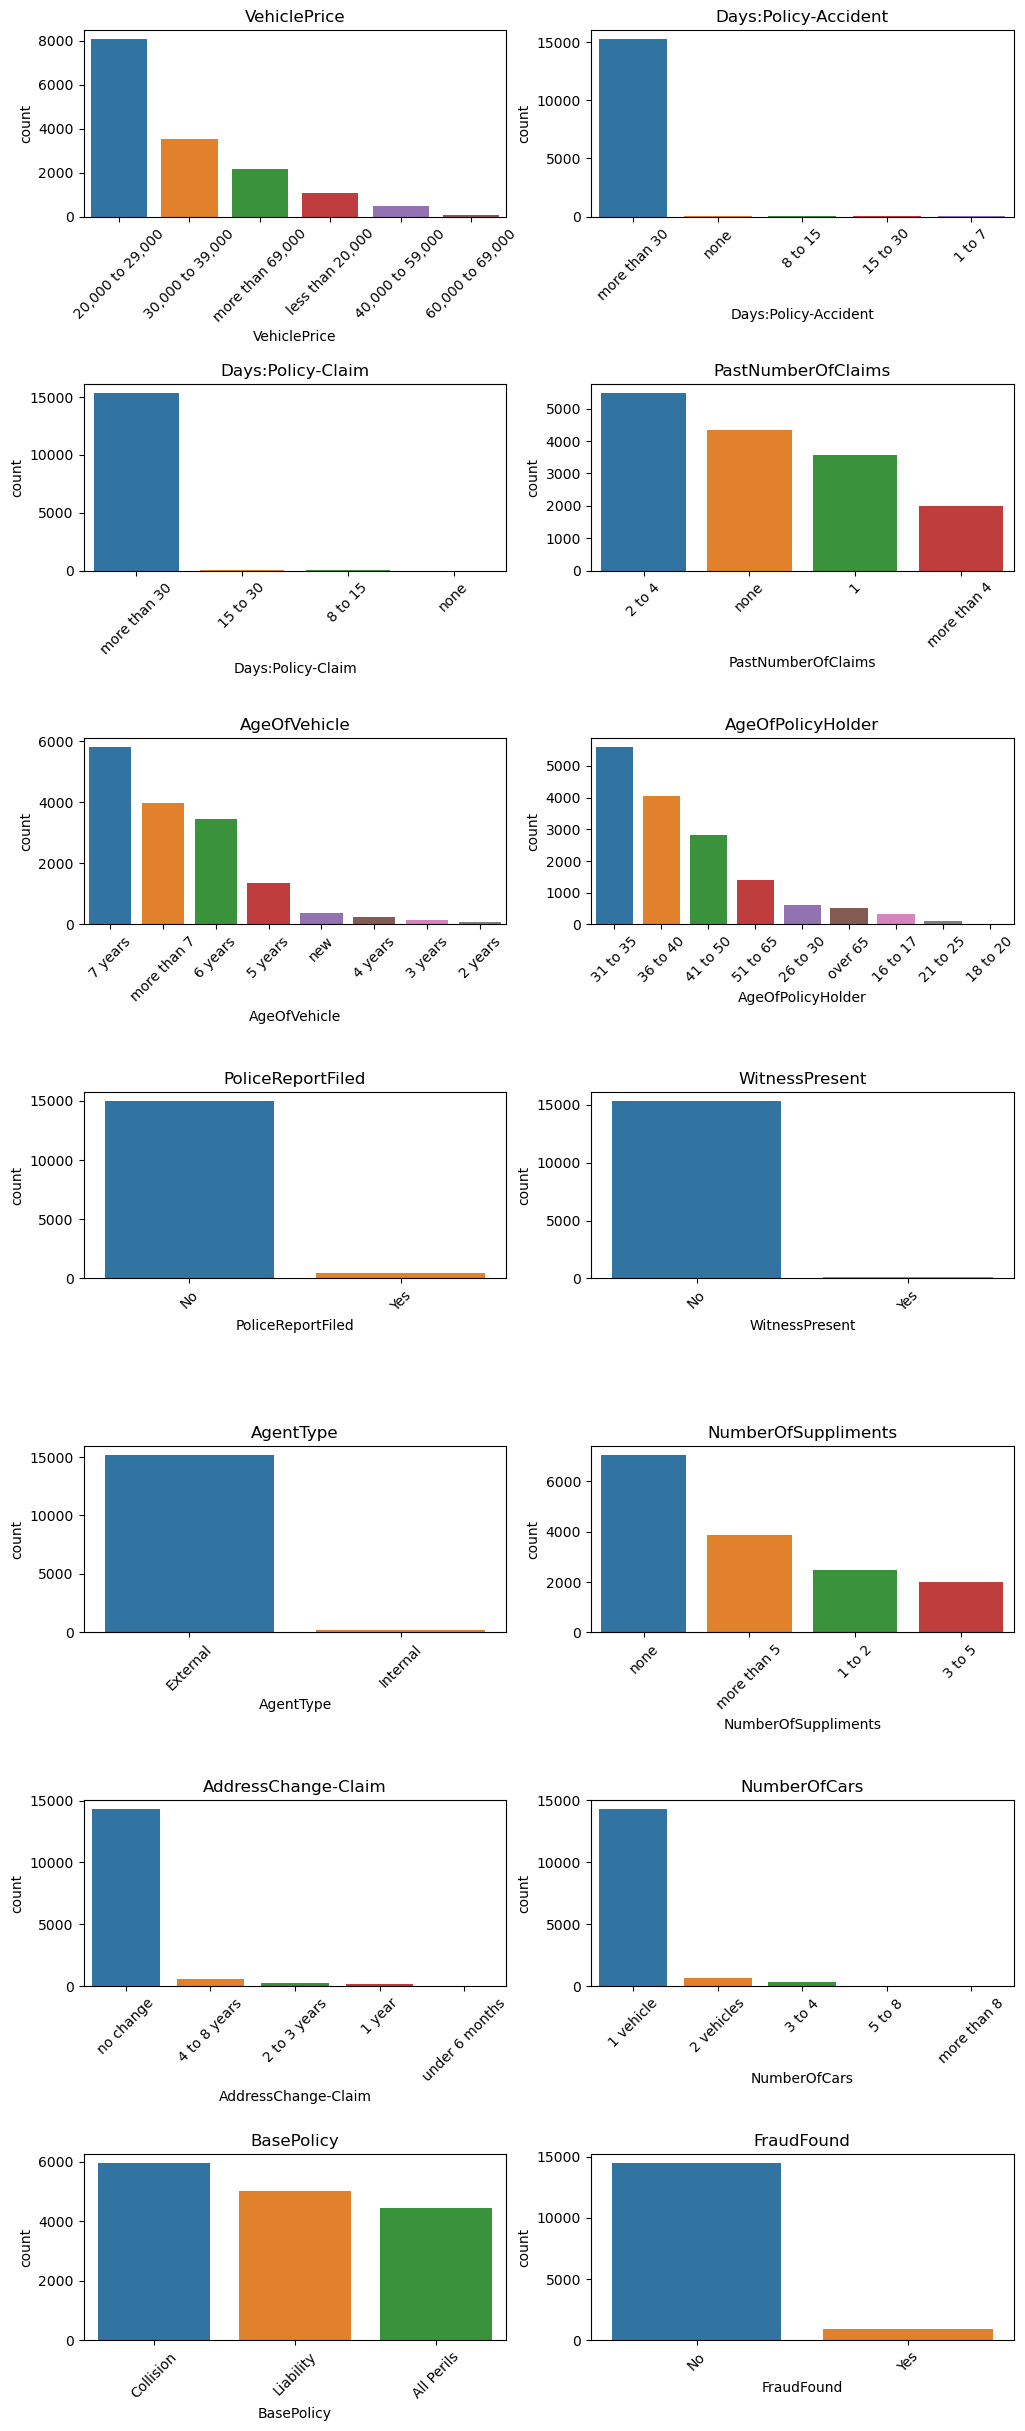

In [32]:
fig, ax = plt.subplots(7, 2, figsize=(12, 30))

# Loop through each column in cat_col
for i, c in enumerate(cat_col.columns[11:26]):
    row = i // 2
    col = i % 2 
    sorted_categories = cat_col[c].value_counts().index
    sns.countplot(x=c, data=cat_col, ax=ax[row, col],order=sorted_categories)
    
    # Set labels for the x-axis
    ax[row, col].set_title(c)
    ax[row, col].tick_params(axis='x', rotation=45)
    plt.subplots_adjust(hspace=.9, wspace=0.2)

- Days:policy accidents, days:policyClaims, PoliceReportedFiled, Witness:Present, AgentType, AddressChange-Claim, and NumberOfCars have massive class imbalance and only one class tends to be a majority. I think it would be reasonable to drop those columns entirely but i will run models including them just to double check. It could be usefull in a Decision tree model.
- The vehicle price column shows that most cars are between 20K-29K. But what is not mentioned in the description is that is the vehicle price is the current market value of the car or the value of the car when it was brand new. 
- PastNumberOfClaims seems reasonable with no major surprises but it is interesting that there are many people that have between 2-4 past claim. I would be interesting to add driverRating to the graph. It may show that lower rated column drivers are more likey to have more than one claim in the past.
- Age shows the same result from the histogram analysis in the previous section.
- Based on reaserach the NumberOfSuppliments idicates extra protection in specific situations. It seems that majority of people don't have it and the individuals that do, possibly are for utility coverages like work trucks or delivery trucks.
- Base Policy is roughly spread out and can be based on type of car car worth. If a car is worth a lot of money and is big then it may be reasonble to add more insurance especially if a car is big enough to cause damage to others around the accident.

# 4. Storytelling With Data graph

Reproduce any graph of your choice in p. 52-68 of the Storytelling With Data book as best you can.  (The second half of chapter two).  You do not have to get the exact data values right, just the overall look and feel.

Text(0.5, 1.0, 'Total Claim Amount Based on City and fraud')

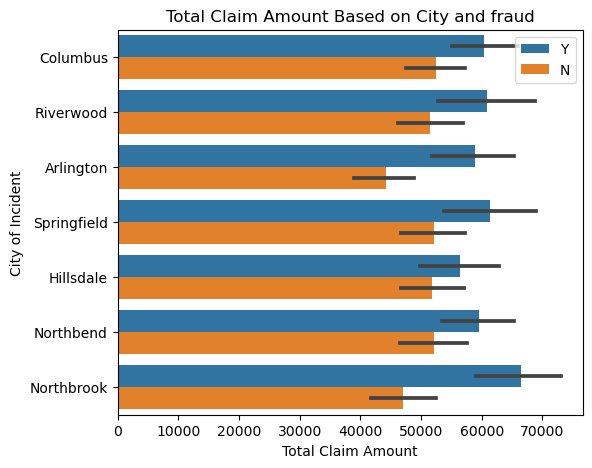

In [38]:
plt.figure(figsize=(6,5))
sns.barplot(x='total_claim_amount',y='incident_city', data= df_insurance_claims,hue='fraud_reported', orient='h')
plt.xlabel('Total Claim Amount')
plt.ylabel('City of Incident')
plt.legend(loc='best')
plt.title('Total Claim Amount Based on City and fraud')